# 数据挖掘互评作业：频繁模式与关联规则挖掘

## 1. 对数据集进行处理，转换成适合进行关联规则挖掘的形式

In [1]:
import csv
import pandas as pd
import numpy as np
from cffi.backend_ctypes import xrange

读取youtube数据集中其中一个csv文件中的所有数据

In [2]:
f = open('C:/Users/LMQ/Desktop/数据集/youtube-new/CAvideos.csv', 'r', encoding='utf-8')
df = pd.read_csv(f)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


删除非数值属性的列

In [3]:
drops = ['trending_date', 'title', 'channel_title',
         'publish_time', 'tags', 'thumbnail_link',
         'comments_disabled', 'ratings_disabled',
         'video_error_or_removed', 'description']
df.drop(drops, axis=1, inplace=True)

查看删除后的结果

In [4]:
df.head()

,video_id,category_id,views,likes,dislikes,comment_count
0,n1WpP7iowLc,10,17158579,787425,43420,125882
1,0dBIkQ4Mz1M,23,1014651,127794,1688,13030
2,5qpjK5DgCt4,23,3191434,146035,5339,8181
3,d380meD0W0M,24,2095828,132239,1989,17518
4,2Vv-BfVoq4g,10,33523622,1634130,21082,85067


可以看到只剩下每个video的数值属性列，然后可以算出四个其数值属性（views、likes、dislikes和conmment_count）的均值。

In [5]:
views = []
likes = []
dislikes = []
comment_count = []
for i in df['views']:
    views.append(i)
for i in df['likes']:
    likes.append(i)
for i in df['dislikes']:
    dislikes.append(i)
for i in df['comment_count']:
    comment_count.append(i)
print("views均值：",np.mean(views))
print("likes均值：",np.mean(likes))
print("dislikes均值：",np.mean(dislikes))
print("comment_count均值：",np.mean(comment_count))

views均值： 1147035.9107898534
likes均值： 39582.68824148137
dislikes均值： 2009.1954453168953
comment_count均值： 5042.974707076637


In [6]:
我们将这四个数值属性的值进行事务型数据转换处理，当属性值>均值时，标位yes，否则为no。

SyntaxError: invalid character in identifier (<ipython-input-6-93ae8278354c>, line 1)

In [7]:
result = []
cols = ['category_id','views','likes','dislikes','comment_count']
names = ['views','likes','dislikes','comment_count']
means = [2360784.6382573447,74266.7024347359,3711.400888910596,8446.803682629612]
for i, name in enumerate(names):
    now = df[name]
    now[now >= means[i]] = 'yes'
    now[now != 'yes'] = 'no'
    df[name] = now
print(df)

          video_id  category_id views likes dislikes comment_count
0      n1WpP7iowLc           10   yes   yes      yes           yes
1      0dBIkQ4Mz1M           23    no   yes       no           yes
2      5qpjK5DgCt4           23   yes   yes      yes            no
3      d380meD0W0M           24    no   yes       no           yes
4      2Vv-BfVoq4g           10   yes   yes      yes           yes
...            ...          ...   ...   ...      ...           ...
40876  sGolxsMSGfQ           24    no    no       no            no
40877  8HNuRNi8t70           24    no    no       no            no
40878  GWlKEM3m2EE           20    no    no       no            no
40879  lbMKLzQ4cNQ           25    no    no       no            no
40880  POTgw38-m58           24    no    no       no            no

[40881 rows x 6 columns]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
for i in range(len(df)):
    now = list()
    for j in range(len(cols)):
        if df.loc[i][cols[j]] == 'yes':
            now.append(cols[j])
    result.append(now)
#打印前5个看看是否转换成功
for i in range(5):
    print(result[i])

['views', 'likes', 'dislikes', 'comment_count']
['likes', 'comment_count']
['views', 'likes', 'dislikes']
['likes', 'comment_count']
['views', 'likes', 'dislikes', 'comment_count']


## 2. 找出频繁模式

In [10]:
def print_dict(curdict):
    keys = curdict.keys()
    sorted(keys)
    for curkey in keys:
        print("%s:%s" % (curkey, curdict[curkey]))
    s = dict()
def get_c1():
    global record_list
    global record_dict
    new_dict = dict()
    for row in samples:
        for item in row:
            if item not in fre_list:
                fre_list.append(item)
                new_dict[item] = 1
            else:
                new_dict[item] = new_dict[item] + 1
    fre_list.sort()
    print("候选集:")
    print_dict(new_dict)
    for key in fre_list:
        if new_dict[key] < min_support:
            del new_dict[key]
    print("剪枝结果:")
    print_dict(new_dict)
    record_list = fre_list
    record_dict = record_dict
    
def get_candidateset():
    new_list = list()
    # 自连接
    for i in range(0, len(fre_list)):
        for j in range(0, len(fre_list)):
            if i == j:
                continue
            # 如果两个k项集可以自连接，必须保证它们有k-1项是相同的
            if has_samesubitem(fre_list[i], fre_list[j]):
                curitem = fre_list[i] + ',' + fre_list[j]
                curitem = curitem.split(",")
                curitem = list(set(curitem))
                curitem.sort()
                curitem = ','.join(curitem)
                # 如果一个k项集要成为候选集，必须保证它的所有子集都是频繁的
                if has_infresubset(
                        curitem) == False and already_constains(
                        curitem, new_list) == False:
                    new_list.append(curitem)
    new_list.sort()
    return new_list
def has_samesubitem(str1, str2):
    str1s = str1.split(",")
    str2s = str2.split(",")
    if len(str1s) != len(str2s):
        return False
    nums = 0
    for items in str1s:
        if items in str2s:
            nums += 1
            str2s.remove(items)
    if nums == len(str1s) - 1:
        return True
    else:
        return False
def has_infresubset(item):
    # 由于是逐层搜索的，所以对于Ck候选集只需要判断它的k-1子集是否包含非频繁集即可
    subset_list = get_subset(item.split(","))
    for item_list in subset_list:
        if already_constains(item_list, fre_list) == False:
            return True
    return False
def has_infresubset(item):
    # 由于是逐层搜索的，所以对于Ck候选集只需要判断它的k-1子集是否包含非频繁集即可
    subset_list = get_subset(item.split(","))
    for item_list in subset_list:
        if already_constains(item_list, fre_list) == False:
            return True
    return False
def get_subset(arr):
    newlist = list()
    for i in range(0, len(arr)):
        arr1 = arr[0:i] + arr[i + 1:len(arr)]
        newlist1 = get_fullpermutation(arr1)
        for newlist_item in newlist1:
            newlist.append(newlist_item)
    newlist.sort()
    newlist = remove_dumplicate(newlist)
    return newlist
def get_fullpermutation(arr):
    if len(arr) == 1:
        return [arr]
    else:
        newlist = list()
        for i in range(0, len(arr)):
            sublist = get_fullpermutation(
                arr[0:i] + arr[i + 1:len(arr)])
            for item in sublist:
                curlist = list()
                curlist.append(arr[i])
                curlist.extend(item)
                newlist.append(curlist)
        return newlist
def remove_dumplicate(arr):
    newlist = list()
    for i in range(0, len(arr)):
        if already_constains(arr[i], newlist) == False:
            newlist.append(arr[i])
    return newlist
def already_constains(item, curlist):
    import types
    items = list()
    if isinstance(item,str):
        items = item.split(",")
    else:
        items = item
    for i in range(0, len(curlist)):
        curitems = list()
        if isinstance(curlist[i], str):
            curitems = curlist[i].split(",")
        else:
            curitems = curlist[i]
        if len(set(items)) == len(curitems) and len(list(
                set(items).difference(set(curitems)))) == 0:
            return True
    return False
def judge(candidatelist):
    # 计算候选集的支持度
    new_dict = dict()
    for item in candidatelist:
        new_dict[item] = get_support(item)
    print("候选集:")
    print_dict(new_dict)
    # 剪枝
    # 频繁集的支持度要大于最小支持度
    new_list = list()
    for item in candidatelist:
        if new_dict[item] < min_support:
            del new_dict[item]
            continue
        else:
            new_list.append(item)
    global fre_list
    fre_list = new_list
    print("剪枝结果:")
    print_dict(new_dict)
    return new_dict
def get_support(item, splitetag=True):
    if splitetag:
        items = item.split(",")
    else:
        items = item.split("^")
    support = 0
    for row in samples:
        tag = True
        for curitem in items:
            if curitem not in row:
                tag = False
                continue
        if tag:
            support += 1
    return support

samples = result
tNum = len(samples)
min_support_degree = 0.08
min_confidence = 0.8
min_support = tNum * min_support_degree
fre_list = list()
record_list = list()
record_dict = dict()
get_c1()
# 不断进行自连接和剪枝，直到得到最终的频繁集为止;终止条件是，如果自连接得到的已经不再是频繁集
# 那么取最后一次得到的频繁集作为结果
while True:
    record_list = fre_list
    new_list = get_candidateset()
    judge_dict = judge(new_list)
    if len(judge_dict) == 0:
        break
    else:
        record_dict = judge_dict
print("最终候选集:")
print(record_list)

候选集:
views:4919
likes:5750
dislikes:4100
comment_count:6067
剪枝结果:
views:4919
likes:5750
dislikes:4100
comment_count:6067
候选集:
comment_count,dislikes:3118
comment_count,likes:4343
comment_count,views:3215
dislikes,likes:2993
dislikes,views:2988
likes,views:3540
剪枝结果:
comment_count,likes:4343
候选集:
剪枝结果:
最终候选集:
['comment_count,likes']


## 3. 导出关联规则，计算其支持度和置信度以及关联规则的评价 

In [51]:
# -*- coding: utf-8 -*-
import csv
import pandas as pd
import numpy as np
from cffi.backend_ctypes import xrange


def create_C1(data_set):
    """
    Create frequent candidate 1-itemset C1 by scaning data set.
    Args:
        data_set: A list of transactions. Each transaction contains several items.
    Returns:
        C1: A set which contains all frequent candidate 1-itemsets
    """
    C1 = set()
    for t in data_set:
        for item in t:
            item_set = frozenset([item])
            C1.add(item_set)
    return C1


def is_apriori(Ck_item, Lksub1):
    """
    Judge whether a frequent candidate k-itemset satisfy Apriori property.
    Args:
        Ck_item: a frequent candidate k-itemset in Ck which contains all frequent
                 candidate k-itemsets.
        Lksub1: Lk-1, a set which contains all frequent candidate (k-1)-itemsets.
    Returns:
        True: satisfying Apriori property.
        False: Not satisfying Apriori property.
    """
    for item in Ck_item:
        sub_Ck = Ck_item - frozenset([item])
        if sub_Ck not in Lksub1:
            return False
    return True


def create_Ck(Lksub1, k):
    """
    Create Ck, a set which contains all all frequent candidate k-itemsets
    by Lk-1's own connection operation.
    Args:
        Lksub1: Lk-1, a set which contains all frequent candidate (k-1)-itemsets.
        k: the item number of a frequent itemset.
    Return:
        Ck: a set which contains all all frequent candidate k-itemsets.
    """
    Ck = set()
    len_Lksub1 = len(Lksub1)
    list_Lksub1 = list(Lksub1)
    for i in range(len_Lksub1):
        for j in range(1, len_Lksub1):
            l1 = list(list_Lksub1[i])
            l2 = list(list_Lksub1[j])
            l1.sort()
            l2.sort()
            if l1[0:k - 2] == l2[0:k - 2]:
                Ck_item = list_Lksub1[i] | list_Lksub1[j]
                # pruning
                if is_apriori(Ck_item, Lksub1):
                    Ck.add(Ck_item)
    return Ck


def generate_Lk_by_Ck(data_set, Ck, min_support,
                      support_data):
    """
    Generate Lk by executing a delete policy from Ck.
    Args:
        data_set: A list of transactions. Each transaction contains several items.
        Ck: A set which contains all all frequent candidate k-itemsets.
        min_support: The minimum support.
        support_data: A dictionary. The key is frequent itemset and the value is support.
    Returns:
        Lk: A set which contains all all frequent k-itemsets.
    """
    Lk = set()
    item_count = {}
    for t in data_set:
        for item in Ck:
            if item.issubset(t):
                if item not in item_count:
                    item_count[item] = 1
                else:
                    item_count[item] += 1
    t_num = float(len(data_set))
    for item in item_count:
        if (item_count[item] / t_num) >= min_support:
            Lk.add(item)
            support_data[item] = item_count[item] / t_num
    return Lk


def generate_L(data_set, k, min_support):
    """
    Generate all frequent itemsets.
    Args:
        data_set: A list of transactions. Each transaction contains several items.
        k: Maximum number of items for all frequent itemsets.
        min_support: The minimum support.
    Returns:
        L: The list of Lk.
        support_data: A dictionary. The key is frequent itemset and the value is support.
    """
    support_data = {}
    C1 = create_C1(data_set)
    L1 = generate_Lk_by_Ck(data_set, C1, min_support, support_data)
    Lksub1 = L1.copy()
    L = []
    L.append(Lksub1)
    for i in range(2, k + 1):
        Ci = create_Ck(Lksub1, i)
        Li = generate_Lk_by_Ck(data_set, Ci, min_support, support_data)
        Lksub1 = Li.copy()
        L.append(Lksub1)
    return L, support_data


def generate_big_rules(L, support_data, min_conf,
                       min_support):
    """
    Generate big rules from frequent itemsets.
    Args:
        L: The list of Lk.
        support_data: A dictionary. The key is frequent itemset and the value is support.
        min_conf: Minimal confidence.
    Returns:
        big_rule_list: A list which contains all big rules. Each big rule is represented
                       as a 3-tuple.
    """
    big_rule_list = []
    sub_set_list = []
    for i in range(0, len(L)):
        # i -> i# 项集
        for freq_set in L[i]:
            # freq_set -> i项集中的每个元素
            for sub_set in sub_set_list:
                if sub_set.issubset(freq_set):
                    conf = support_data[freq_set] / \
                           support_data[freq_set - sub_set]
                    sup = support_data[freq_set]
                    lift = conf / support_data[sub_set]
                    big_rule = (
                    freq_set - sub_set, sub_set, conf, sup,
                    lift)
                    if conf >= min_conf and sup >= min_support and big_rule not in big_rule_list:
                        # print freq_set-sub_set, " => ", sub_set, "conf: ", conf
                        big_rule_list.append(big_rule)
            # l1中的每个元素都在其中
            sub_set_list.append(freq_set)
    return big_rule_list


import matplotlib.pyplot as plt


def plot_bar(rules, data, title):
    plt.title(title)
    plt.xticks(range(len(data)), rules, rotation=90)
    plt.bar(range(len(data)), data, color='B')
    # plt.savefig('figures\\'+title+'.png')
    plt.show()



data_set = result
    # L是一个列表，元素是字典，每个字典代表了一个k项集，如k=3，那么就有三个字典，每个字典中的是其对应的k项集的内容
    # support是一个字典，key是频繁项集，value是对应的出现次数
L, support_data = generate_L(data_set, k=3, min_support=0.02)
    # big_rules_list是一个列表，列表的元素是元组->(规则条件，规则结果，置信度)
big_rules_list = generate_big_rules(L, support_data,
                                        min_conf=0.5,
                                        min_support=0.02)
    # L is a list with sets element,
for Lk in L:
    print("=" * 100)
    print("frequent " + str(len(list(Lk)[0])) + "-itemsets\t\t\t\tsupport")
    print("=" * 100)
    for freq_set in Lk:
        print(freq_set, '\t\t' , support_data[freq_set])
print()
print("Big Rules is: ")
print('=' * 100)
for item in big_rules_list:
    print(
        "{}=>{}, confidence: {:.2f}, support: {:.2f}, lift: {:.3f}".format(
            list(item[0]), list(item[1]), item[2],
            item[3], item[4]))

frequent 1-itemsets				support
frozenset({'views'}) 		 0.10051699123362691
frozenset({'likes'}) 		 0.1174980076424791
frozenset({'comment_count'}) 		 0.12397572388989926
frozenset({'dislikes'}) 		 0.08378118805811553
frequent 2-itemsets				support
frozenset({'views', 'likes'}) 		 0.07233790383554366
frozenset({'dislikes', 'likes'}) 		 0.06116026728242434
frozenset({'comment_count', 'views'}) 		 0.06569671209922961
frozenset({'comment_count', 'likes'}) 		 0.08874675603326726
frozenset({'dislikes', 'views'}) 		 0.06105809510186566
frozenset({'comment_count', 'dislikes'}) 		 0.06371457179639128
frequent 3-itemsets				support
frozenset({'comment_count', 'views', 'likes'}) 		 0.061609824876882525
frozenset({'comment_count', 'dislikes', 'likes'}) 		 0.055704272840590964
frozenset({'dislikes', 'views', 'likes'}) 		 0.05296605840161841
frozenset({'comment_count', 'dislikes', 'views'}) 		 0.051739992234914274

Big Rules is: 
['likes']=>['views'], confidence: 0.62, support: 0.07, lift: 6.125
['v

## 4. 可视化分析 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:163: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


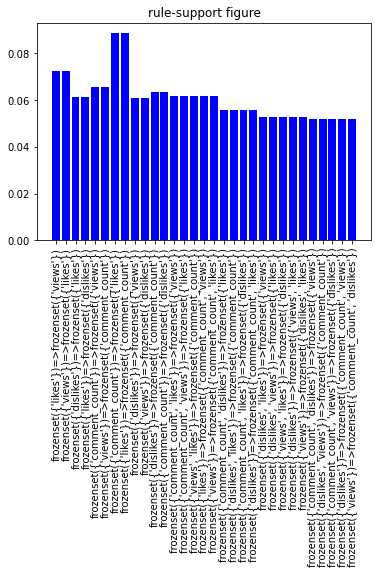

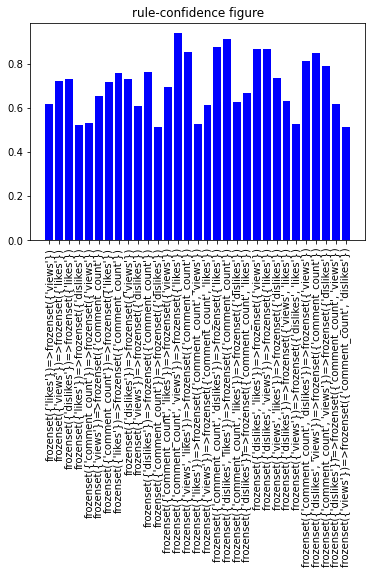

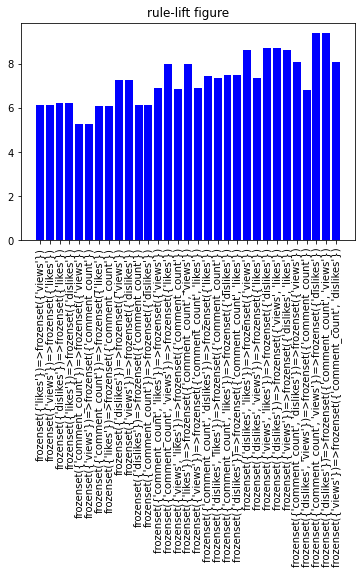

In [52]:
def visualization(big_rule_list):
    rules = []
    conf = []
    support = []
    lift = []
    for i in range(len(big_rule_list)):
        rule = "{}=>{}".format(big_rules_list[i][0],
                               big_rules_list[i][1])
        rules.append(rule)
        conf.append(big_rule_list[i][2])
        support.append(big_rule_list[i][3])
        lift.append(big_rule_list[i][4])
    plot_bar(rules, support, 'rule-support figure')
    plot_bar(rules, conf, 'rule-confidence figure')
    plot_bar(rules, lift, 'rule-lift figure')

visualization(big_rules_list)

从规则lift提升度来看，可以发现比较有意思的数据，即规则['comment_count', 'views']=>['dislikes']和['dislikes']=>['comment_count', 'views']提升度最高，进一步分析可得大多数视频当观看次数和评论数同时多的时候，那么往往意味着这个视频不受大家喜欢，属于被吐槽的内容，这反映出观影人员喜欢对不喜欢的视频评论较多的现象。

## 该数据集中的其他子集可同理进行分析，只需要改变文件路径运行即可。

Github地址：https://github.com/LIMINQIN/Data-Mining-Work2